# Crop Disease: if target's astype is float values

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
paths=[]
for dirname, _, filenames in os.walk('/kaggle/input/crop-diseases-classification/Data/train_images'):
    for filename in filenames:
        paths+=[(os.path.join(dirname, filename))]
print(len(paths))

17938


In [3]:
data=pd.read_csv('/kaggle/input/crop-diseases-classification/Data/train.csv')
dir0='/kaggle/input/crop-diseases-classification/Data/train_images'
data['image_path']=data['image_id'].apply(lambda x: os.path.join(dir0,x))

In [4]:
drops=[]
for i in range(len(data)):
    p=data.loc[i,'image_path']
    if p not in paths:
        drops+=[i]
data=data.drop(index=drops,axis=0).reset_index(drop=True)

## number data limitted for quick running

In [5]:
data=data[0:100]

# label: integer value to float value
 to make the data a non-classification task

In [6]:
data['label']=data['label'].astype(float)
display(data[0:2])

,image_id,label,image_path
0,157078263.jpg,3.0,/kaggle/input/crop-diseases-classification/Dat...
1,1574893536.jpg,3.0,/kaggle/input/crop-diseases-classification/Dat...


In [7]:
from sklearn.model_selection import train_test_split

train_data, temp_data = train_test_split(data, test_size=0.4, random_state=42)
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

print(f"Train data: {len(train_data)}")
print(f"Validation data: {len(val_data)}")
print(f"Test data: {len(test_data)}")

Train data: 60
Validation data: 20
Test data: 20


# extrace features from image data

In [8]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def extract_features(image_path):
    img = load_img(image_path, target_size=(224, 224))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    
    model = ResNet50(weights='imagenet', include_top=False, pooling='avg')
    features = model.predict(img_array)
    return features.flatten()

2024-06-26 09:32:19.863827: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-26 09:32:19.863942: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-26 09:32:19.982540: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [9]:
for dataset in [train_data, val_data, test_data]:
    for idx, row in dataset.iterrows():
        features = extract_features(row['image_path'])
        for i, feature in enumerate(features):
            dataset.at[idx, str(i).zfill(4)] = feature

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


I0000 00:00:1719394359.317303      70 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
/tmp/ipykernel_25/1438762603.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataset.at[idx, str(i).zfill(4)] = feature
/tmp/ipykernel_25/1438762603.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataset.at[idx, str(i).zfill(4)] = feature
/tmp/ipykernel_25/1438762603.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `fra

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 

/tmp/ipykernel_25/1438762603.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataset.at[idx, str(i).zfill(4)] = feature
/tmp/ipykernel_25/1438762603.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataset.at[idx, str(i).zfill(4)] = feature
/tmp/ipykernel_25/1438762603.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use 

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


/tmp/ipykernel_25/1438762603.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataset.at[idx, str(i).zfill(4)] = feature
/tmp/ipykernel_25/1438762603.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataset.at[idx, str(i).zfill(4)] = feature
/tmp/ipykernel_25/1438762603.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use 

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


In [10]:
train_data.to_csv('train_features.csv', index=False)
val_data.to_csv('val_features.csv', index=False)
test_data.to_csv('test_features.csv', index=False)
display(train_data[0:3])

,image_id,label,image_path,0000,0001,0002,0003,0004,0005,0006,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
49,1600900862.jpg,3.0,/kaggle/input/crop-diseases-classification/Dat...,0.229648,0.055680,1.569969,0.258798,0.000000,0.494567,0.784050,...,0.000358,0.338896,0.815587,0.0,0.000000,1.590162,0.087894,0.019318,0.394088,0.374989
34,1598014441.jpg,3.0,/kaggle/input/crop-diseases-classification/Dat...,2.807975,0.174664,0.180731,0.240630,0.053913,0.087974,0.324001,...,0.065523,0.062153,0.000000,0.0,0.000000,1.550536,0.000000,0.000000,0.818994,0.047843
7,1586131534.jpg,3.0,/kaggle/input/crop-diseases-classification/Dat...,1.157970,0.000000,0.593478,1.097813,0.000000,0.587600,0.555638,...,0.112552,0.000000,0.117106,0.0,0.001363,0.303007,0.017067,0.047426,0.000000,0.155940


# Model fitting

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


feature_columns =[]
for i in range(2048):
    feature_columns+=[str(i).zfill(4)]

X_train = train_data[feature_columns].values
y_train = train_data['label'].values

X_val = val_data[feature_columns].values
y_val = val_data['label'].values

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

val_predictions = model.predict(X_val)
val_accuracy = accuracy_score(y_val, val_predictions)
print(f"Validation Accuracy: {val_accuracy:.4f}")

Validation Accuracy: 0.6500


# Predict in Test

In [12]:
X_test = test_data[feature_columns].values
y_test = test_data['label'].values

test_predictions = model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 0.6000


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

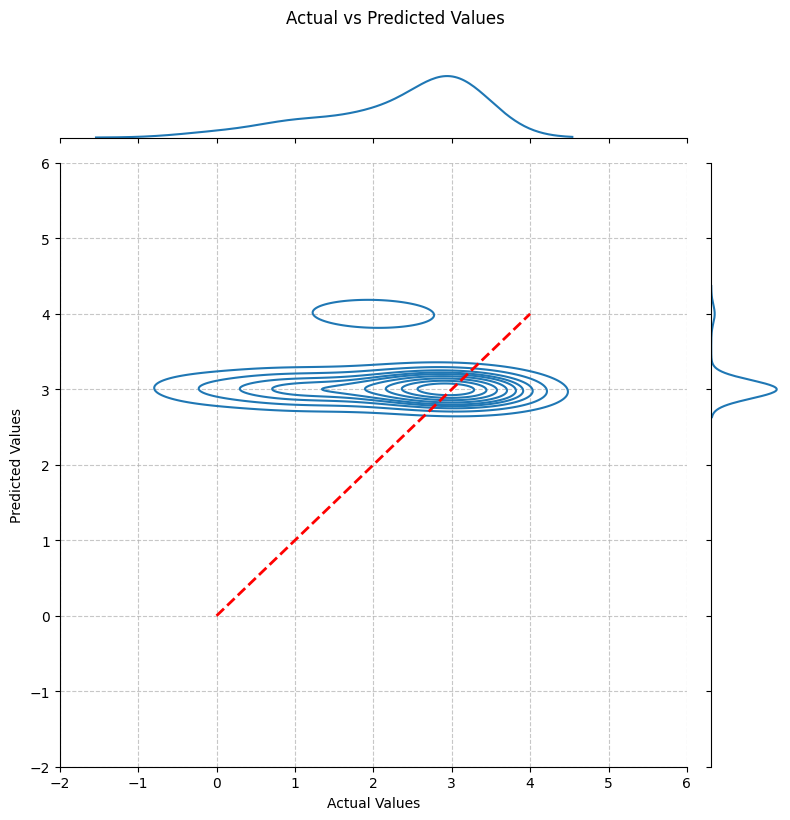

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

g = sns.jointplot(x=y_test, y=test_predictions, kind="kde", height=8, ratio=7, space=0.2)
min_val = min(min(y_test), min(test_predictions))
max_val = max(max(y_test), max(test_predictions))
g.ax_joint.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)
g.ax_joint.set_xlabel('Actual Values')
g.ax_joint.set_ylabel('Predicted Values')
g.fig.suptitle('Actual vs Predicted Values', y=1.02)
g.ax_joint.grid(True, linestyle='--', alpha=0.7)
g.ax_joint.set_xlim(min_val-2, max_val+2)
g.ax_joint.set_ylim(min_val-2, max_val+2)
plt.tight_layout()
plt.show()